In [1]:
#| echo: false
#| output: false

%pip install matplotlib-venn

import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn3

/home/amarov/stats/stat2025/.venv/bin/python3: No module named pip


Note: you may need to restart the kernel to use updated packages.


# Probability


Open in Google Colab (class): [![Open in Colab (class)](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/stat2025/blob/main/03-Probability-Class.ipynb)


Open in Google Colab (full): [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/stat2025/blob/main/03-Probability.ipynb)



## Goats, Cars, and Probability

Take a look at the Monty Hall game where you choose one of three doors. 
Behind one door is a car (the prize you want) and behind the other two doors are goats. Every
game begins with random placement of the car and goats behind the doors. 

https://www.mathwarehouse.com/monty-hall-simulation-online


When you play the game you pick one of the three doors and are then shown one of the doors you did not pick that has a goat behind it.
You have the option to stick with your original choice or switch to the other unopened door. Use only the "keep choice"
strategy for now and play the game a couple of times.

You will notice that you win the car about 1 out of 3 games. The game is an example of a random experiment.
In _one_ game you either win the car or you do not, so the possible outcomes 
of the experiment are "C" (short for car) and "G" (short for goat).

We call the set of all possible outcomes the _sample space_ of the experiment and will denote
it with the Greek letter omega: $\Omega = \{C, G\}$.

The probability law of the experiment is a function that assigns values between 0 and 1 to subsets
of the sample space. If $A \in \Omega$, then $P(A)$ is the probability of the set $A$ occurring.
We will use the words subset of the sample space and event interchangeably.

In this game there are only four possible events:

- You win the car: $\text{Win} = \{C\}$
- You win a goat: $\text{Lose} = \{G\}$
- You win either a car or a goat: $\text{All} = \{C, G\}$
- You win nothing: $\text{None} = \emptyset$

If the positions of the car and the goats are reshuffled reasonably well before every game, then
we can assign a probability of $1/3$ to the event $\text{Win}$, a probability of $1/3$ to the event $\text{Lose}$, a probability of $2/3$ to the event $\text{All}$.

The empty set $\emptyset$ is special in that it contains no outcomes and is a subset of every set. We assign it a probability of 0: $P(\emptyset) = 0$.

You can understand the probability of each event as the long-run relative frequency of that event occurring if you played the game many times.


In [2]:
# Simulation of Monty Hall Problem

import numpy as np
import pandas as pd

# Create a DataFrame representing the contents behind the doors
monty = pd.DataFrame({
    "behind_the_door": ["goat", "goat", "car"],
})
monty


,behind_the_door
0,goat
1,goat
2,car


In [3]:
# In every game, pick one of the doors at random, change 
# the number of games to n = 10_000 and look at the counts
# of each outcome below

played_games = monty.sample(n = 10, replace = True)
played_games

,behind_the_door
0,goat
2,car
2,car
0,goat
1,goat
1,goat
1,goat
0,goat
0,goat
1,goat


In [4]:
# Count the number of times we picked the car (the second row in the result)

played_games["behind_the_door"].value_counts()

behind_the_door
goat    8
car     2
Name: count, dtype: int64

In [5]:
# The same as above, but outputs the _shares_ of each outcome

played_games["behind_the_door"].value_counts(normalize=True)

behind_the_door
goat    0.8
car     0.2
Name: proportion, dtype: float64

:::{#def-probability}
## Probability

A probability law is a _function_ that assigns a number between 0 and 1 to each set (event) in the sample space. Let $\Omega$ be a non-empty set and
let $A$ and $B$ be subsets of $\Omega$. A probability law must satisfy the following properties:

1. $P(A) \geq 0$ for all $A \subseteq \Omega$ (all events have non-negative probability).
2. $P(\emptyset) = 0$. (The probability of the empty set is 0).
3. $P(\Omega) = 1$. (The probability of the entire sample space is 1).
4. If $A$ and $B$ are disjoint, i.e. $A \cap B = \emptyset$, then $P(A \cup B) = P(A) + P(B)$.

:::



## Sets

As you can see the definition of probability heavily relies on the concept of sets. A set is a collection of distinct objects, considered as an object in its own right. We will use capital letters to denote sets, and the elements of a set will be denoted by lowercase letters.

There are a couple of important set operations that we will use in the context of probability:

1. **Union**: The union of two sets $A$ and $B$ is the set of elements that are in $A$, in $B$, or in both. The union of $A$ and $B$ is denoted by $A \cup B$.
2. **Intersection**: The intersection of two sets $A$ and $B$ is the set of elements that are in both $A$ and $B$. The intersection of $A$ and $B$ is denoted by $A \cap B$.
3. **Complement**: The complement of a set $A$ is the set of elements that are not in $A$. The complement of $A$ is denoted by $A^c$ (or sometimes $\bar{A}$).
4. **Difference**: The difference of two sets $A$ and $B$ is the set of elements that are in $A$ but not in $B$. The difference of $A$ and $B$ is denoted by $A \setminus B$.

:::{#def-emptyset}
## The Empty Set

The empty set is a special set that contains no elements. It is denoted by $\emptyset$ or $\{\}$.

:::

:::{#def-disjoint}
## Disjoint sets

Two sets are called disjoint if their intersection is the empty set, i.e. $A \cap B = \emptyset$. This means that the sets do not have any elements in common.

:::


The union and intersection of sets are _commutative_ and _distributive_. Commutative means that you can change the order of the sets without changing the result.

- $A \cup B = B \cup A$.
- $A \cap B = B \cap A$.

Distributive means that you can distribute the union or intersection over the other set.

- $A \cup (B \cap C) = (A \cup B) \cap (A \cup C)$.
- $A \cap (B \cup C) = (A \cap B) \cup (A \cap C)$.

:::{#thm-de-morgan}
## De Morgan's Laws

De Morgan's laws are a pair of rules that relate the complement of the union and the intersection of sets.

1. The complement of the union of two sets is the intersection of their complements: $(A \cup B)^c = A^c \cap B^c$.
2. The complement of the intersection of two sets is the union of their complements: $(A \cap B)^c = A^c \cup B^c$.

This also generalizes to more than two sets.

Let $A_1$, $A_2$, $\ldots$, $A_n$ be a collection of sets.

1. The complement of the union of the sets is the intersection of their complements: 

$$
\left(\bigcup_{i=1}^n A_i\right)^c = \bigcap_{i=1}^n A_i^c
$$.

2. The complement of the intersection of the sets is the union of their complements:

$$
\left(\bigcap_{i=1}^n A_i\right)^c = \bigcup_{i=1}^n A_i^c
$$.

In the case of only three sets $A_1$, $A_2$, and $A_3$, the laws can be written as:

1. $(A_1 \cup A_2 \cup A_3)^c = A_1^c \cap A_2^c \cap A_3^c$.
2. $(A_1 \cap A_2 \cap A_3)^c = A_1^c \cup A_2^c \cup A_3^c$.

:::

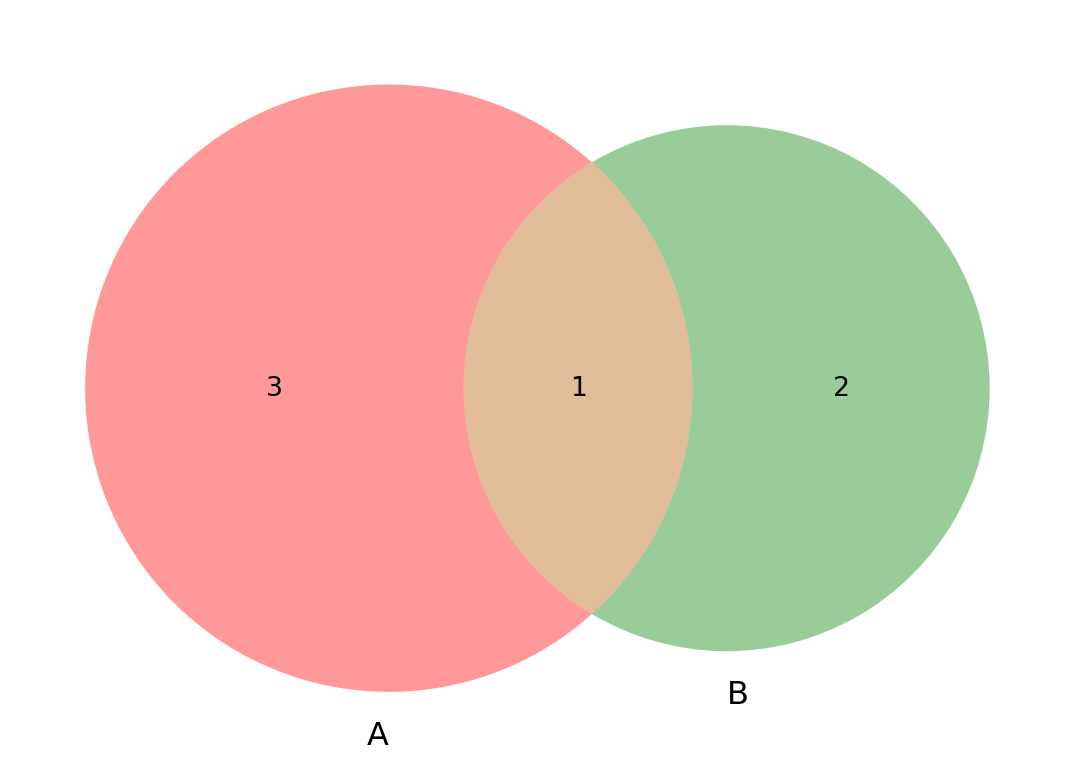

In [6]:
#| label: fig-venn-intersecting
#| fig-cap: "Two sets intersecting"

venn2([
    set(['1', '2', '3', '4']), 
    set(['2', '5', '6'])
    ], 
    set_labels=["A", "B"]
)


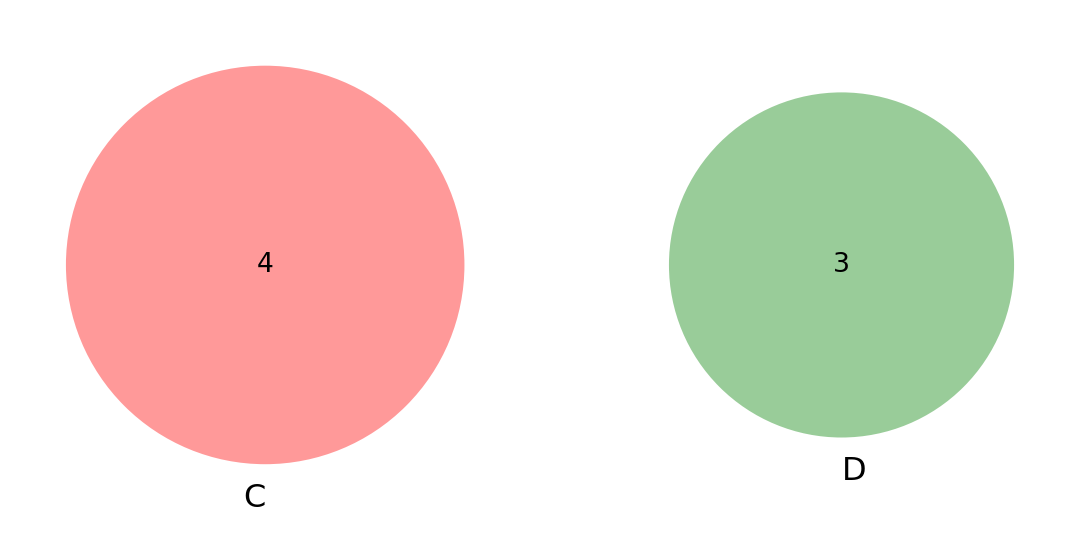

In [7]:
#| label: fig-venn-disjoint
#| fig-cap: "Two disjoint sets"

venn2([
    set(['1', '2', '3', '4']), 
    set(['5', '6', '7'])
    ],
    set_labels=["C", "D"]
)


:::{#exr-de-morgan}
## De Morgan's Laws

Use the sets from the Venn diagram in @fig-venn-intersecting to show the validity of De Morgan's laws. Assume that $\Omega = A \cup B$

- The first set is $A = \{1, 2, 3, 4\}$
- The second set is $B = \{2, 5, 6\}$

- Write down the complements of $A$ and $B$ and the intersection of $A$ and $B$. 
- Then, write down the union of $A$ and $B$ and its complement. Compare the results.

:::
:::{.callout-note collapse="true"}
## Solution (click to expand)

$$
\begin{align*}
\Omega & = A \cup B = \{1, 2, 3, 4, 5, 6\} \\
A^c & = \{5, 6\} \\
B^c & = \{1, 3, 4\} \\
A^c \cup B^c & = \{1, 3, 4, 5, 6\} \\
A \cap B & = \{2\} \\
(A \cap B)^{c} & = \{1, 3, 4, 5, 6\} = A^c \cup B^c
\end{align*}
$$
:::

## Some Properties of Probability Laws

The definition of probability appears simple, but we will see that we can derive surprisingly many properties from it.

The probability of the union of two events is the sum of the probabilities of the events minus the probability of their intersection.

:::{#thm-probability-union}
## Probability of the Union of Two Events

$$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

:::


:::{#thm-probability-of-complement}
## Probability of the Complement

The probability of an event is one minus the probability of the complement of the event.

$$
P(A) = 1 - P(A^c)
$$
:::
:::{.proof}
This follows directly from the definition of probability and the fact that $A \cap A^c = \emptyset$ and $A \cup A^c = \Omega$.

$$
P(A \cup A^c) = P(\Omega) = 1 \implies P(A) + P(A^c) = 1
$$
:::


For a justification of this formula, consider the Venn diagram in @fig-venn-intersecting. The probability of the union of the two events is the sum of the probabilities of the two events. However, the intersection of the two events is counted twice, so we need to subtract it once.

Use the following Venn diagram to show the validity of the formula.

$$
P(A \cup B \cup C) = P(A) + P(A^c \cap B) + P(A^c \cap B^c \cap C)
$$


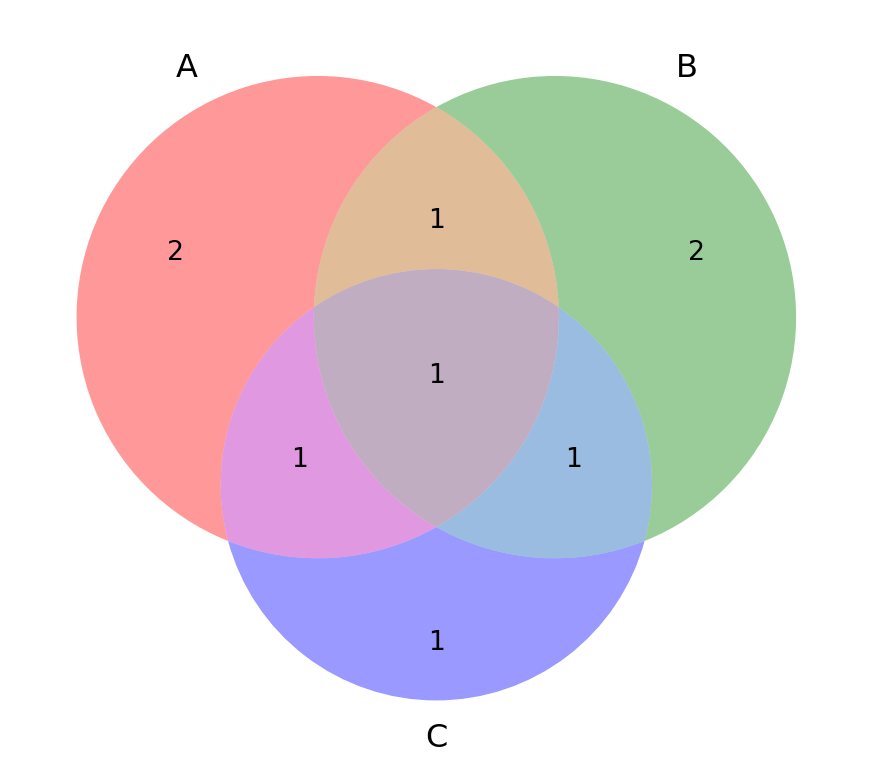

In [8]:
#| label: fig-venn-three-intersecting
#| fig-cap: "Three sets intersecting. The values shown within the sets are the number of elements in each set."

venn3((
    set(['1', '2', '3', '4', '9']), 
    set(['3', '5', '6', '7', '9']), 
    set(['2', '3', '5', '8'])),
    set_labels=["A", "B", "C"]
)

:::{#exr-de-morgan-2}

A consumer survey indicates that 60 percent of the customers will buy product A, 70 percent will buy product B, and 40 percent will buy both products. 

- What is the probability that a randomly selected customer will buy neither product A nor product B?
- What is the probability that a randomly selected customer will buy _exactly_ on of the products?

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

Let $A$ be the event that a customer buys product A and $B$ be the event that a customer buys product B. We are given that $P(A) = 0.6$, $P(B) = 0.7$, and $P(A \cap B) = 0.4$. We want to find $P((A \cup B)^c)$. The union of $A$ and $B$ is the event that a customer buys either product A or product B or both. The complement of this event is the event that a customer buys neither product A nor product B, which is what we are looking for.

We know that the probability of the complement of any event is one minus the probability of the event. Therefore, we have

$$
P((A \cup B)^c) = 1 - P(A \cup B)
$$

Furthermore, we already know how to compute the probability of the union of two events: it is sum of the probabilities of the two events minus the probability of their intersection. 

$$
P((A \cup B)^c) = 1 - (P(A) + P(B) - P(A \cap B))
$$

The last formula involves only quantities that we know, so we can plug in the numbers and compute the result.

$$
P((A \cup B)^c) = 1 - (0.6 + 0.7 - 0.4) = 0.3
$$

For the second part, note that the event that a customer buys exactly one of the products is the event that a customer buys either product A or product B but not both.
In a Venn diagram, this corresponds to the area that is in either $A$ or $B$ but not in $A \cap B$ (i.e. the intersection of $A$ and $B$).

This means that we need to compute $P(A \cup B) - P(A \cap B)$ and we know $P(A)$, $P(B)$, and $P(A \cap B)$.

$$
P(A \cup B) - P(A \cap B) = P(A) + P(B) - P(A \cap B) - P(A \cap B) = P(A) + P(B) - 2P(A \cap B)
$$

:::


## The Sample Space

Consider a couple of simple experiments with a random outcome

- The classic example is flipping a coin once: the outcomes can be either heads or tails.
- Another example is rolling a die: the outcomes can be any of the numbers 1, 2, 3, 4, 5, or 6.

The sample space of the experiment is the set of _all_ possible outcomes. For the coin flip, the sample space is $\{H, T\}$, and for the die roll, the sample space is $\{1, 2, 3, 4, 5, 6\}$. These are very easy examples, but depending on the experiment, the sample space can be much more complex.

There are no formulas that tell how to construct a sample space for a given experiment. However, there are two key properties that the sample space must satisfy:

1. The sample space must be **exhaustive**: it must contain all possible outcomes. For example, if you are flipping a coin, the sample space must include both heads and tails: a sample space of $\{H\}$ would not be exhaustive.
2. The elements of the sample space must be **mutually exclusive**: when the experiment is performed, only _one_ of the elements of $\Omega$ can occur.




## Events and Probability

An event is a subset of the sample space. For example, if you are flipping a coin, the event of getting heads is the subset $\{H\}$ of the sample space $\{H, T\}$. If you are rolling a die, the event of getting an even number is the subset $\{2, 4, 6\}$ of the sample space $\{1, 2, 3, 4, 5, 6\}$.

In experiments with a **finite number of equally likely outcomes**, the probability of an event is the number of outcomes in the event divided by the total number of outcomes in the sample space. For example, the probability of getting heads when flipping a coin is $1/2$ because there is one outcome in the event $\{H\}$ and two outcomes in the sample space $\{H, T\}$. The probability of getting an even number when rolling a die is $3/6 = 1/2$ because there are three outcomes in the event $\{2, 4, 6\}$ and six outcomes in the sample space $\{1, 2, 3, 4, 5, 6\}$.


$$
P(A) = \frac{\text{number of elements in } A}{\text{number of elements in the sample space}}
$$




## Discrete Sample Spaces

A sample space is discrete if it consists of a finite or countably infinite number of outcomes. For example, the sample space of rolling a die is discrete because there are only six possible outcomes. The sample space of flipping a coin is also discrete because there are only two possible outcomes. The number of accidents in a day is also a discrete sample space because it can only take on integer values (which are countably infinite). The sample space of selecting a real number between 0 and 1 (or any other real interval) is not discrete because there are uncountably many possible outcomes (Cantor's theorem).


:::{#exr-sample-space-coin}
## The Sample Space of Three Coin Flips

Consider an experiment of flipping a coin three times (each toss can result either in a head (H) or in a tail (T) ). 

- Write down the sample space of the experiment.
- Write down the set $A$ consisting of all outcomes where the first flip is a head.
- Write down the set $B$ consisting of all outcomes where the number of heads is even.
- Assume that the coin is fair and that all outcomes are equally likely. What are the probabilities of the events $A$ and $B$?
:::
:::{.callout-note collapse="true"}
## Solution (click to expand)

The size of the sample space is $2^3 = 8$. The sample space is $\{HHH, HHT, HTH, HTT, THH, THT, TTH, TTT\}$.

- The set $A$ consists of the outcomes $\{HHH, HHT, HTH, HTT\}$.
- The set $B$ consists of the outcomes $\{HHH, HHT, THH, TTT\}$ (zero is an even number).

The probability of the event $A$ is $4/8 = 1/2$ and the probability of the event $B$ is $4/8 = 1/2$.
:::

In [9]:
# A coin flipping game

# Here we simulate the result of 3 coin flips repeated 10 times (1 for heads, 0 for tails)
# np.random.choice selects a value at random from the given list
# The size specifies the number of times the selection is made
# In our case, we are selecting 3 values 10 times and storing the results in coin_results

coin_3flips = np.random.choice([1, 0], size=[10, 3])
coin_3flips

array([[1, 0, 1],
       [1, 0, 1],
       [0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [0, 0, 0],
       [1, 1, 0],
       [1, 0, 0],
       [1, 1, 1],
       [1, 0, 0]])

In [10]:
# Check the shape of the coin_results array, it should be (10, 3), the same as the size we specified

coin_3flips.shape

(10, 3)

In [11]:
# The _number_ of games where the first coin landed on heads (1) in each of the 10 games
# - We select the first column of the matrix (coin_results[:, 0]), because the first coin flip is stored in the first column
# - We then check how many times the value 1 appears in the first column
# - The sum() function is used to count the number of times the value 1 appears in the first column

(coin_3flips[:, 0] == 1).sum()

np.int64(7)

In [12]:
# The _proportion_ of games where the number of heads in each game is even

(coin_3flips.sum(axis=1) % 2 == 0).mean()

np.float64(0.6)

:::{#exr-sample-space-die}
## The Sample Space of Two Die Rolls

Consider an experiment of rolling a four sided die twice.

![Four sided die](https://upload.wikimedia.org/wikipedia/commons/8/80/Dald%C3%B8s_dice.jpg){style="width:300px"}

- Write down the sample space of the experiment.
- How many outcomes are in the sample space?
- Write down the set (event) $A$ consisting of all outcomes where the sum of the two rolls is 7.
- Write down the set (event) $B$ consisting of all outcomes where the sum of the two rolls is odd.
- Write down the set (event) $C$ consisting of all outcomes where the first roll is greater than the second roll.
- Write down the set (event) $D$ consisting of all outcomes where the two rolls are the same.

Assume that the die is fair and that all outcomes are equally likely. 
- What are the probability of the events $A$ and $B$: $P(A)$ and $P(B)$?
- What is the probability of the event $A \cap B$?
- What is the probability of the event $A \cup B$?
- What is the probability of the event $A^c$?
- What is the probability of the event $A \cap C$?

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

The size of the sample space is $4^2 = 16$. The sample space is

$$
\Omega = \left\{
    \begin{array}{cccc}
    (1, 1), (2, 1), (3, 1), (4, 1), \\
    (1, 2), (2, 2), (3, 2), (4, 2), \\
    (1, 3), (2, 3), (3, 3), (4, 3), \\
    (1, 4), (2, 4), (3, 4), (4, 4)
    \end{array}
\right\}
$$

The event $A$ consists of the outcomes $\{(3, 4), (4, 3)\}$. It has two elements, so assuming that each sequence in the sample space is equally likely, the probability of $A$ is $2/16 = 1/8$.

The event $B$ consists of the outcomes $\{(1, 2), (2, 1), (4, 1), (1, 4), (3, 4), (4, 3)\}$. It has six elements, so the probability of $B$ is $6/16 = 3/8$.

The event $C$ consists of the outcomes $\{(2, 1), (3, 1), (4, 1), (3, 2), (4, 2), (4, 3)\}$. It has six elements, so the probability of $C$ is $6/16 = 3/8$.

The event $A \cap B$ consists of the outcomes $\{(3, 4), (4, 3)\}$, so the probability of $A \cap B$ is $2/16 = 1/8$. It is the same as the probability of $A$ because a is a subset of $B$ ($A \subset B$).

The event $A^c$ consists of $\Omega \ A$. Its probability is $P(A^c) = 1 - P(A) = 7/8$.
The event $A \cap C$ consists of only one outcome $\{(3, 4)\}$ (which is common to $A$ and $C$), so the probability of $A \cap C$ is $1/16$.

:::

In [13]:
# Simulation of 10 rolls of a four-sided die

die_rolls = np.random.choice([1, 2, 3, 4], size=[10, 2])
die_rolls

array([[3, 3],
       [1, 3],
       [1, 3],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 2],
       [2, 4],
       [4, 2],
       [3, 4]])

In [14]:
# Event A: sum of the two rolls is greater than 7
# - we can sum the values in each row to get the total of the two rolls: this is what die_rolls.sum(axis=1). The axes in the arrays are indexed: 0 for rows and 1 for columns
# - The == operator checks if the sum is equal to 7 and returns a boolean array (True and False)

event_A = (die_rolls.sum(axis=1) == 7)
event_A

array([False, False, False, False, False, False, False, False, False,
        True])

In [15]:
# Event B: sum of the two rolls is odd (the != operator checks for inequality)
# - as in the previous cell, we sum the values in each row to get the total of the two rolls
# - % is the modulo operator. If the sum is even, the modulo of 2 will be 0, and if it is odd, the modulo will be 1
# - the != operator checks if the modulo is different from zero and returns a boolean array (True and False)

event_B = (die_rolls.sum(axis=1) % 2 != 0)
event_B

array([False, False, False, False, False, False, False, False, False,
        True])

In [16]:
# Event C: first roll is greater than the second roll.
# - the square brackets after the array are used to select parts of the array. The : operator selects all the elements in the array (in this case, all the rows)
# - after a comma we can specify the column we want to select. The first column has index 0 and the second column has index 1
# - the > operator checks if the value in the first column is greater than the value in the second column and returns a boolean array (True and False)

event_C = (die_rolls[:, 0] > die_rolls[:, 1])
event_C

array([False, False, False, False, False, False,  True, False,  True,
       False])

In [17]:
# Event D: $D$ the two rolls are the same.
# Exactly as before, but here we check for equality using the == operator

event_D = (die_rolls[:, 0] == die_rolls[:, 1])
event_D

array([ True, False, False,  True,  True,  True, False, False, False,
       False])

In [18]:
# The intersection of A and B (A and B occurring together)
# - The & operator is used to combine two boolean arrays. It returns a new boolean array where the value is True only if both arrays have True in the same position

event_A_and_B = event_A & event_B
event_A_and_B.sum()

np.int64(1)

## Exercises


:::{#exr-racing}
## Racing Cars and Betting

Consider a car race with 6 cars. You believe that the probability of winning is equal for the first three cars, and the probabilities of winning for cars 4, 5, and 6 are equal to 1/7. You must place a bet on one of the following two events:

- One of cars 1, 2, or 5 wins
- One of cars 3, 5, or 6 wins

Which event would you bet on? Justify your answer. The reward is the same for both events.
:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

Let $A_1, A_2, A_3, A_4, A_5, A_6$ be the events that cars 1, 2, 3, 4, 5, and 6 win, respectively. Only one car can be the winner, so these events
cannot occur simultaneously (they are disjoint). We want to calculate the probability of the events

$$
A_1 \cup A_2 \cup A_5 \quad \text{and} \quad A_3 \cup A_5 \cup A_6
$$

As the events are disjoint, the probability of their union is the sum of the probabilities of the events. We have

$$
P(A_1 \cup A_2 \cup A_5) = P(A_1) + P(A_2) + P(A_5) \\
P(A_3 \cup A_5 \cup A_6) = P(A_3) + P(A_5) + P(A_6)
$$

We know the probabilities for the events $A_4, A_5, A_6$:

$$
P(A_4) = P(A_5) = P(A_6) = 1/7
$$

We are still missing the probabilities for the events $A_1, A_2, A_3$ but we can obtain them from the fact that the sum of the probabilities of all elements of the sample space must be 1.

$$
\begin{align*}
\Omega = A_1 \cup A_2 \cup A_3 \cup A_4 \cup A_5 \cup A_6 \implies \\
P(A_1) + P(A_2) + P(A_3) + P(A_4) + P(A_5) + P(A_6) = 1 \\
P(A_1) + P(A_2) + P(A_3) + 3 \cdot 1/7 = 1
\end{align*}
$$

We know that the first three probabilities are equal, so we can write

$$
3x + 3 \cdot 1/7 = 1 \implies x = 4/21 \implies P(A_1) = P(A_2) = P(A_3) = 4/21
$$

Now you simply substitute these probabilities in the equations above and compare the results. As the rewards are the same, you should bet on the event with the higher probability.

:::


:::{#exr-probability-customers}
## Student Enrollment

In a class of 100 students, 36 of them are enrolled in a statistics course, 28 in microeconomics, and 18 in an macroeconomics course. Furthermore, 22 of the students study both statistics and microeconomics, 12 study both statistics and macroeconomics, 9 study both microeconomics and macroeconomics, and 4 are enrolled in all three courses. You select a student at random. What is the probability that the student is enrolled in at least one of the courses?

:::
:::{.callout-note collapse="true"}
## Solution (click to expand)

This exercise is about the inclusion-exclusion principle. Let $St$ be the event that a student is enrolled in statistics, $Mi$ be the event that a student is enrolled in microeconomics, and $Ma$ be the event that a student is enrolled in macroeconomics. We want to calculate the probability of the event $St \cup Mi \cup Ma$. We have

$$
P(St \cup Mi \cup Ma) = P(St) + P(Mi) + P(Ma) - P(St \cap Mi) - P(St \cap Ma) - P(Mi \cap Ma) + P(St \cap Mi \cap Ma)
$$

Justify this formula by drawing a Venn diagram. The probabilities of the events $St$, $Mi$, and $Ma$ are $36/100$, $28/100$, and $18/100$, respectively. The probabilities of the pairwise intersections are $22/100$, $12/100$, and $9/100$. The probability of the intersection of all three events is $4/100$. Substitute these values into the formula above to get the result.

:::


:::{#exr-dice-rolls-until-4}
## Dice Rolls Until 2

You take a four-sided die and roll it until you get a 2. Describe the sample space of the experiment.

:::

:::{#exr-probability-model}
## Probability Model

You are given a loaded four-sided die. The even numbers are twice as likely as the odd numbers, but the 
each even number is equally likely and each odd number is equally likely. Construct a probability model for this die.

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

The sample space of this experience is $\{1, 2, 3, 4\}$. We know the following:

$$
\begin{align*}
P(\{1\}) = P(\{3\}) = x \\
P(\{2\}) = P(\{4\}) = 2x
\end{align*}
$$

As the probabilities of all outcomes must sum to 1, we have

$$
P(\{1\}) + P(\{2\}) + P(\{3\}) + P(\{4\}) = 1 \implies 2x + 2x + x + x = 1 \implies x = 1/6
$$

So the probability model is

$$
\begin{align*}
P(\{1\}) = P(\{3\}) = 1/6 \\
P(\{2\}) = P(\{4\}) = 1/3
\end{align*}
$$

:::


:::{#exr-bonferroni}
## Bonferroni's Inequalities

Let $A$ and $B$ be two events. Show that

$$
P(A \cap B) \geq P(A) + P(B) - 1
$$

Also, let $A_1, A_2, \ldots, A_n$ be a sequence of events. Show that

$$
P(\cap_{i=1}^n A_i) \geq \sum_{i=1}^n P(A_i) - n + 1
$$

:::
:::{.callout-note collapse="true"}
## Solution (click to expand)

The first inequality follows directly from the definition of probability. We know that 

$$
P(A \cup B) = P(A) + P(B) - P(A \cap B) \leq 1
$$

For the second part, we need to use de Morgan's laws, specifically the second part of @thm-de-morgan. We have

$$
P(\cap_{i=1}^n A_i) = 1 - P((\cup_{i=1}^n A_i)^c) \geq 1 - \sum_{i=1}^n P(A_i^c) = 1 - \sum_{i=1}^n (1 - P(A_i)) = \sum_{i=1}^n P(A_i) - n + 1
$$

:::

:::{#exr-probability}


Let $A$ and $B$ be two sets. Describe the set $(A \cap B^c) \cup (A^c \cap B)$ in words and use a Venn diagram to illustrate it. Use the Venn diagram to explain why the following formula holds:

$$
P((A \cap B^c) \cup (A^c \cap B)) = P(A) + P(B) -2 P(A \cap B),
$$
:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

To describe the set $(A \cap B^c) \cup (A^c \cap B)$ in words, we can use the customers and products example from @exr-de-morgan-2.
Let $A$ be the event that a customer buys product A and $B$ be the event that a customer buys product B.

The event $(A \cap B^c)$ is the event that a customer buys product A but not product B. The event $(A^c \cap B)$ is the event that a customer buys product B but not product A. The union of these two events is the event that a customer buys either product A or product B but not both, or in other words, the event that a customer buys exactly one of the products.

:::